In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# raw_data_x是特征，raw_data_y是标签，0为良性，1为恶性
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343853454, 3.368312451],
              [3.582294121, 4.679917921],
              [2.280362211, 2.866990212],
              [7.423436752, 4.685324231],
              [5.745231231, 3.532131321],
              [9.172112222, 2.511113104],
              [7.927841231, 3.421455345],
              [7.939831414, 0.791631213]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [4]:
# 设置训练组
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

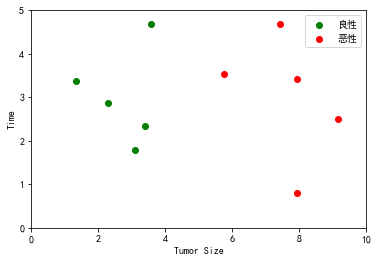

In [8]:
# 将数据可视化
import matplotlib
matplotlib.rcParams['font.family'] = 'SimHei'
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], color='g', label = '良性')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], color='r', label = '恶性')
plt.xlabel('Tumor Size')
plt.ylabel('Time')
plt.legend(loc='best')
plt.axis([0,10,0,5])
plt.show()

In [9]:
# 对于给定的数据（样本点）x：[8.90933607318, 3.365731514]，判断肿瘤类型
x = [8.90933607318, 3.365731514]

In [10]:
from math import sqrt

distances = []  # 用来记录x到样本数据集中每个点的距离
for x_train in X_train:
    d = sqrt(np.sum((x_train - x) ** 2))
    distances.append(d)
    
# 使用列表生成器，一行就能搞定，对于X_train中的每一个元素x_train都进行前面的运算，把结果生成一个列表
distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]

In [11]:
distances

[5.611968000921151,
 6.011747706769277,
 7.565483059418645,
 5.486753308891268,
 6.647709180746875,
 1.9872648870854204,
 3.168477291709152,
 0.8941051007010301,
 0.9830754144862234,
 2.7506238644678445]

在求出距离列表之后，我们要找到最小的距离，需要进行一次排序操作。其实不是简单的排序，因为我们把只将距离排大小是没有意义的，我们要知道距离最小的k个点是在样本集中的位置

In [12]:
nearest = np.argsort(distances)
nearest

array([7, 8, 5, 9, 6, 3, 0, 1, 4, 2], dtype=int64)

距离最小的点在distances数组中的索引是7，第二小的点索引是8... 近到远是哪些点

In [13]:
k = 6
topK_y = [y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [14]:
from collections import Counter
votes = Counter(topK_y)
votes

Counter({1: 5, 0: 1})

In [16]:
# Counter.most_common(n) 找出票数最多的n个元素，返回的是一个列表，列表中的每个元素是一个元组，
# 元组中第一个元素是对应的元素是谁，第二个元素是频次
votes.most_common(1)

[(1, 5)]

In [17]:
predict_y = votes.most_common(1)[0][0] 
predict_y

1

---------------------------------------------------------分割线----------------------------------------------------

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# 创建kNN_classifier实例
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [38]:
# kNN_classifier做一遍fit(拟合)的过程，没有返回值，模型就存储在kNN_classifier实例中
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [41]:
# kNN进行预测predict，需要传入一个矩阵，而不能是一个数组。reshape()成一个二维数组，第一个参数是1表示只有一个数据，第二个参数-1，numpy自动决定第二维度有多少
y_predict = kNN_classifier.predict(np.array(x).reshape(1,-1))
y_predict

array([1])